In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/CSV Comma Separated Values File - Sheet1.csv')
df.head()

,Patients ID,Alb (g|L),CRP(ug|mL),CAR (CRP/Alb),Age (Years),Serum Quantity (mls),Sex
0,D7,33.2,3.5,1.054,57,5,F
1,D9,13.5,3.6,2.667,51,5,M
2,DH6,31.6,4.5,1.424,50,5,F
3,DH7,36.3,5.6,1.53,70,5,M
4,D10,29.4,3.3,1.123,51,5,F


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patients ID           30 non-null     object 
 1   Alb (g|L)             30 non-null     float64
 2   CRP(ug|mL)            30 non-null     float64
 3   CAR (CRP/Alb)         30 non-null     object 
 4   Age (Years)           30 non-null     int64  
 5   Serum Quantity (mls)  30 non-null     int64  
 6   Sex                   30 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.8+ KB


In [ ]:
df['CAR (CRP/Alb)'] = df['CAR (CRP/Alb)'].str.replace(',', '').astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patients ID           30 non-null     object 
 1   Alb (g|L)             30 non-null     float64
 2   CRP(ug|mL)            30 non-null     float64
 3   CAR (CRP/Alb)         30 non-null     float64
 4   Age (Years)           30 non-null     int64  
 5   Serum Quantity (mls)  30 non-null     int64  
 6   Sex                   30 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.8+ KB


In [ ]:
df.head()

,Patients ID,Alb (g|L),CRP(ug|mL),CAR (CRP/Alb),Age (Years),Serum Quantity (mls),Sex
0,D7,33.2,3.5,1.054,57,5,F
1,D9,13.5,3.6,2.667,51,5,M
2,DH6,31.6,4.5,1.424,50,5,F
3,DH7,36.3,5.6,1.530,70,5,M
4,D10,29.4,3.3,1.123,51,5,F


In [ ]:
top_car_by_gender = df.loc[df.groupby('Sex')['CAR (CRP/Alb)'].idxmax()]
top_car_by_gender

,Patients ID,Alb (g|L),CRP(ug|mL),CAR (CRP/Alb),Age (Years),Serum Quantity (mls),Sex
10,S1,36.1,4.4,1218.0,60,5,F
5,H8,12.0,4.8,4.0,75,5,M


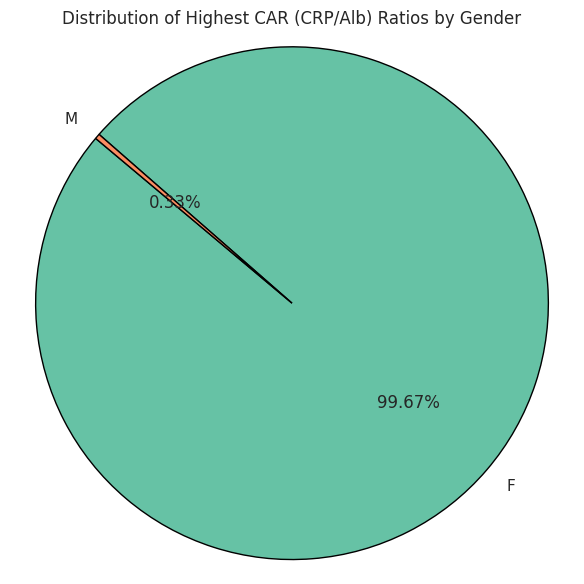

In [ ]:
# Extract values
labels = top_car_by_gender['Sex']
sizes = top_car_by_gender['CAR (CRP/Alb)']
colors = ['#66c2a5', '#fc8d62']  # Custom colors for variety

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.2f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

# Add title
plt.title('Distribution of Highest CAR (CRP/Alb) Ratios by Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular

plt.tight_layout()
plt.show()


In [ ]:
# Cell 4: Find highest CAR ratios for men and women
male_df = df[df['Sex'] == 'M']
female_df = df[df['Sex'] == 'F']
max_male = male_df.loc[male_df['CAR (CRP/Alb)'].idxmax()]
max_female = female_df.loc[female_df['CAR (CRP/Alb)'].idxmax()]

print("Highest CAR Male:")
print(max_male[['Patients ID', 'CAR (CRP/Alb)', 'Alb (g|L)', 'CRP(ug|mL)', 'Age (Years)']])
print("\nHighest CAR Female:")
print(max_female[['Patients ID', 'CAR (CRP/Alb)', 'Alb (g|L)', 'CRP(ug|mL)', 'Age (Years)']])

Highest CAR Male:
Patients ID        H8
CAR (CRP/Alb)     4.0
Alb (g|L)        12.0
CRP(ug|mL)        4.8
Age (Years)        75
Name: 5, dtype: object

Highest CAR Female:
Patients ID          S1
CAR (CRP/Alb)    1218.0
Alb (g|L)          36.1
CRP(ug|mL)          4.4
Age (Years)          60
Name: 10, dtype: object


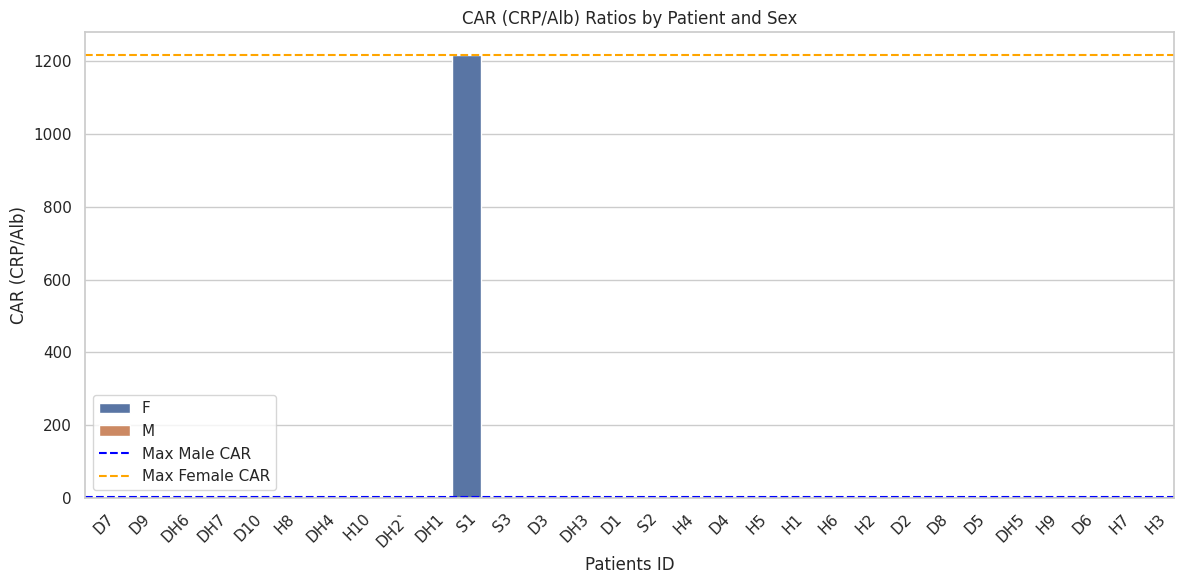

In [ ]:
# Cell 5: Visualization 1 - Bar plot of CAR ratios by patient and sex
plt.figure(figsize=(12, 6))
sns.barplot(x='Patients ID', y='CAR (CRP/Alb)', hue='Sex', data=df)
plt.axhline(y=max_male['CAR (CRP/Alb)'], color='blue', linestyle='--', label='Max Male CAR')
plt.axhline(y=max_female['CAR (CRP/Alb)'], color='orange', linestyle='--', label='Max Female CAR')
plt.title('CAR (CRP/Alb) Ratios by Patient and Sex')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('car_ratios_by_patient.png')
plt.show()